# MNIST练习
[Keras Tutorial: The Ultimate Beginner’s Guide to Deep Learning in Python](https://elitedatascience.com/keras-tutorial-deep-learning-in-python)

In [1]:
import numpy as np
np.random.seed(678)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D

from keras.utils import np_utils

In [2]:
# load mnist
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


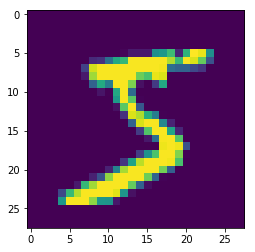

In [5]:
# plot the first sample of x_train
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0])

In [22]:
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [23]:
# convert our data type to float32 and normalize our data values to the range [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
# prepare label
print(y_train.shape)
print(y_train[:10]) #打印前十个label

# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test, 10)

print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [18]:
# define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [19]:
print(model.output_shape)

(None, 10)


In [20]:
# compile
model.compile(loss= 'categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
# 保存训练的模型参数到指定的文件夹，格式为.hdf5; 检测的值是'loss'使其更小。
# model_checkpoint = ModelCheckpoint('./example_mnist.hdf5', monitor='loss',verbose=1, save_best_only=True) # keras

In [25]:
# fit/training
model.fit(x_train, y_train, batch_size=32, nb_epoch=1, verbose=1) #, callbacks=[model_checkpoint]

Epoch 1/1
  160/60000 [..............................] - ETA: 1:07 - loss: 2.3007 - accuracy: 0.1250

/Users/wyou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 65s 1ms/step - loss: 2.3015 - accuracy: 0.1124


In [26]:
# evaluate
score = model.evaluate(x_test, y_test, verbose=0)

In [27]:
print(score)

[2.30104899520874, 0.11349999904632568]
